In [2]:
import gzip         # for reading .pkl.gz
import pickle       # to load the pickled dicts
import numpy as np  # for arrays, math
import matplotlib.pyplot as plt  # for plotting
from sklearn.metrics import r2_score
from matplotlib.colors import ListedColormap
from scipy.signal import find_peaks, peak_prominences, peak_widths
import matplotlib.cm as cm
import colormaps as cmaps
from colormaps.utils import show_cmaps_collection
from scipy.optimize import curve_fit



In [3]:
def mesh_index_to_km(x):
    return (x / 299) * 110

def km_to_mesh_index(x):
    return (x / 110) * 299

# Decreasing Accumulation

Grounding Line Plot - Amax-0.06


In [4]:
gl_run_title_amax06 = str("Grounding Line Evolution Over Time - Max Accumulation - 0.06")
amax_06 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_08_29__17_36_12.pkl.gz"
with gzip.open(amax_06, 'rb') as f:
    DATA_dict_amax_06 = pickle.load(f)

In [5]:
bed_dict = DATA_dict_amax_06['bed_dict']
base_dict = DATA_dict_amax_06['base_dict']
surf_dict= DATA_dict_amax_06 ['surf_dict']
sed_dict = DATA_dict_amax_06['sed_dict']
H_dict = DATA_dict_amax_06['H_dict']
us_dict_06 = DATA_dict_amax_06['us_dict']
ub_dict_06 = DATA_dict_amax_06['ub_dict']
Hs_dict = DATA_dict_amax_06['Hs_dict']
GL_dict_06 = DATA_dict_amax_06['GL_dict']
Qs_dict_06 = DATA_dict_amax_06['Qs_dict']

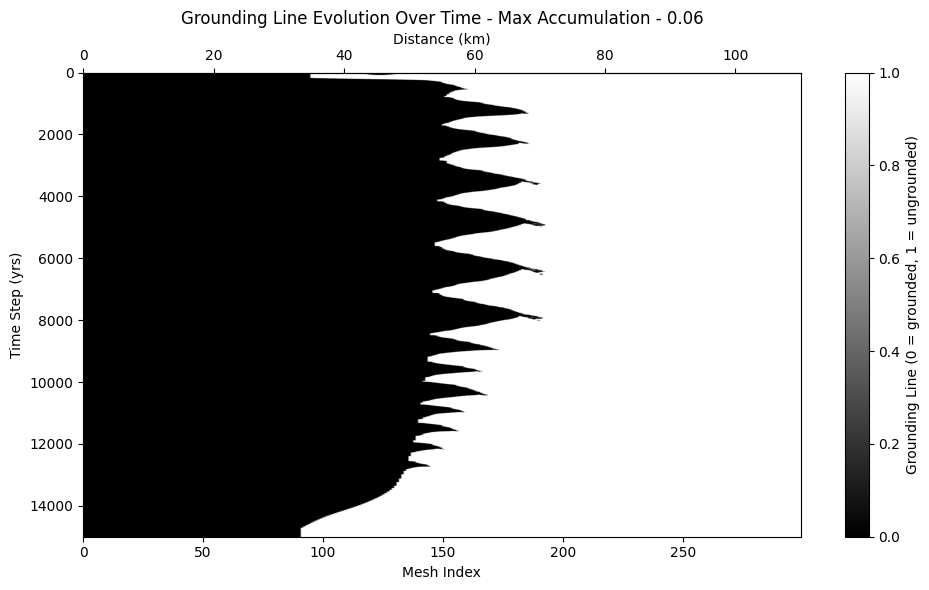

In [6]:
GL_dict = DATA_dict_amax_06['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amax06)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [7]:
gl_positions_amax06 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amax06.append(idx)

gl_positions_amax06 = np.array(gl_positions_amax06)
GL_km_amax06 = mesh_index_to_km(gl_positions_amax06)

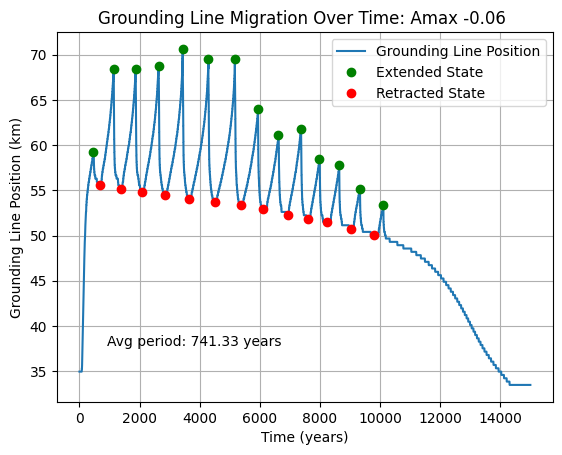

Mean cycle period: 741.33 years
[671.04104519 731.17664818 765.35723967 801.83053734 850.85569445
 884.09396448 769.96340134 681.89288683 745.5299057  618.39067454
 654.87398268 682.81425407 779.45050751]
Mean advance amplitude: 63.30 km
[59.23076923 68.42809365 68.42809365 68.79598662 70.63545151 69.53177258
 69.53177258 64.01337793 61.07023411 61.80602007 58.49498328 57.75919732
 55.18394649 53.34448161]
Mean retreat amplitude: 53.12 km
[55.55183946 55.18394649 54.81605351 54.44816054 54.08026756 53.71237458
 53.34448161 52.97658863 52.24080268 51.8729097  51.50501672 50.76923077
 50.03344482]


In [8]:
peaks_amax06, _ = find_peaks(GL_km_amax06, prominence=3) 
troughs_amax06, _ = find_peaks(-GL_km_amax06, prominence=3)     
periods_amax06 = np.diff(np.array(time)[peaks_amax06])
adv_dists_amax06 = GL_km_amax06[peaks_amax06]
ret_dists_amax06 = GL_km_amax06[troughs_amax06]


plt.plot(time, GL_km_amax06, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amax06], GL_km_amax06[peaks_amax06], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amax06], GL_km_amax06[troughs_amax06], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amax06):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amax -0.06 ")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amax06):.2f} years")
print(periods_amax06)

print(f"Mean advance amplitude: {np.mean(adv_dists_amax06):.2f} km")
print(adv_dists_amax06)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amax06):.2f} km")
print(ret_dists_amax06)


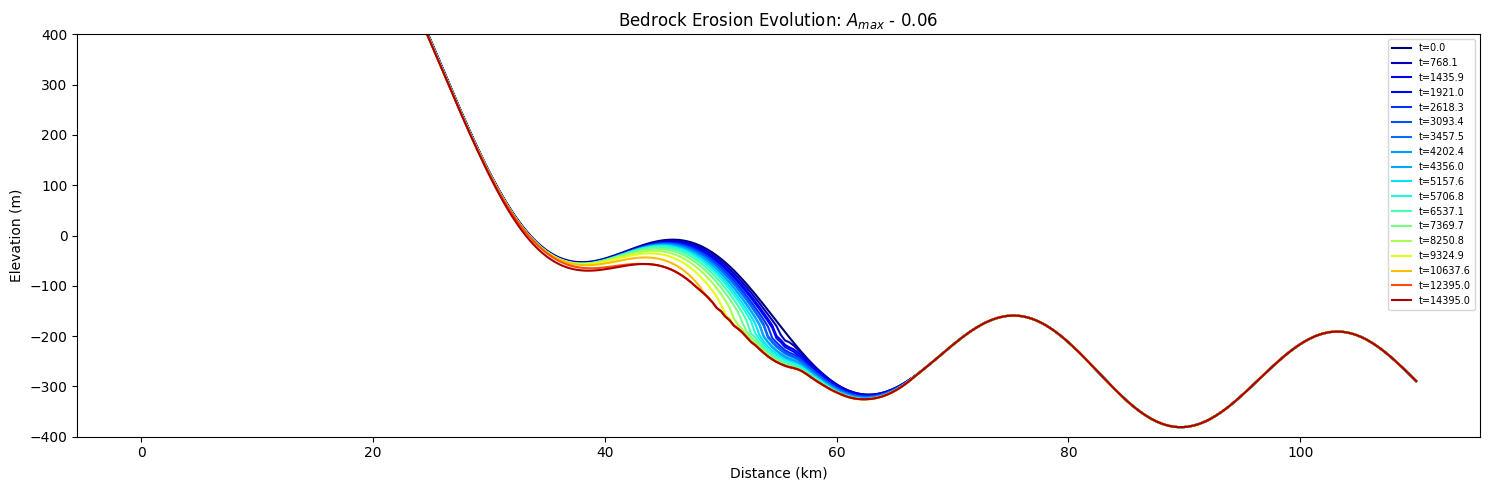

In [9]:
bed_dict = DATA_dict_amax_06['bed_dict']
num_points = len(next(iter(bed_dict.values())))
x_km = mesh_index_to_km(np.arange(num_points))
time = list(bed_dict.keys())
# bed_profile = bed_dict[timesteps[0]] 
norm = plt.Normalize(min(time), max(time))
cmap = cm.jet

fig, ax1 = plt.subplots(figsize=(15,5))

for i, t in enumerate(time):
    if i % 400 != 0:  
        continue

    bed = bed_dict[t]
    color = cmap(norm(t))
    plt.plot(x_km, bed, color=color, label=f't={t:.1f}' if i % 25 == 0 else "")

plt.xlabel("Distance (km)")
plt.ylabel("Elevation (m)")
plt.title("Bedrock Erosion Evolution: $A_{max}$ - 0.06 ")
# plt.gca().invert_xaxis() 
plt.legend(loc="upper right", fontsize=7)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# plt.xlim(30,100)
plt.ylim(-400,400)
# plt.colorbar(sm, label='Time (years)', ax=plt.gca())
# plt.axvline(x=0, color='gray', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()
# fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/Results/ModelPlots/Amax/GL_Plots/Relationship_Plots/Bedrock_Evo_amax5.svg", format ="svg", bbox_inches='tight')

18915.402954221456


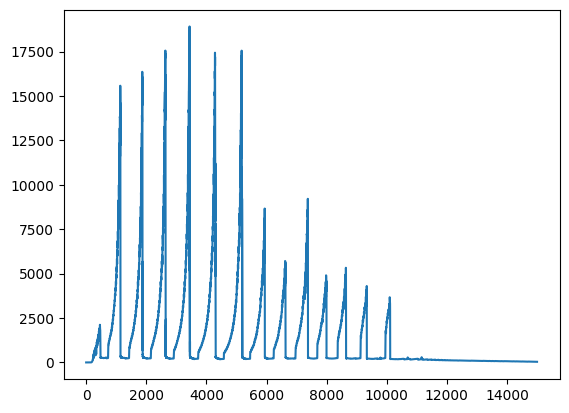

In [10]:
max_Qs_06 = np.array([max(values) for values in Qs_dict_06.values()])
time_06 = np.array(list(Qs_dict_06.keys()))

# mask = time_06 <= 10000

# time_06 = time_06[mask]
# max_Qs_06 = max_Qs_06[mask]
plt.plot(time_06, max_Qs_06)
MAX_06 = np.max(max_Qs_06)

# MAX_21 = np.median(max_Qs_06)
print(MAX_06)

Grounding Line Plot - Amax - 0.05


In [11]:
gl_run_title_amax05 = str("Grounding Line Evolution Over Time - Max Accumulation -0.05")
amax05 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_08_26__20_01_00.pkl.gz"
with gzip.open(amax05, 'rb') as f:
    DATA_dict_amax05 = pickle.load(f)

In [12]:
bed_dict = DATA_dict_amax05['bed_dict']
base_dict = DATA_dict_amax05['base_dict']
surf_dict= DATA_dict_amax05 ['surf_dict']
sed_dict = DATA_dict_amax05['sed_dict']
H_dict = DATA_dict_amax05['H_dict']
us_dict_05 = DATA_dict_amax05['us_dict']
ub_dict_05 = DATA_dict_amax05['ub_dict']
Hs_dict = DATA_dict_amax05['Hs_dict']
GL_dict_05 = DATA_dict_amax05['GL_dict']
Qs_dict_05 = DATA_dict_amax05['Qs_dict']

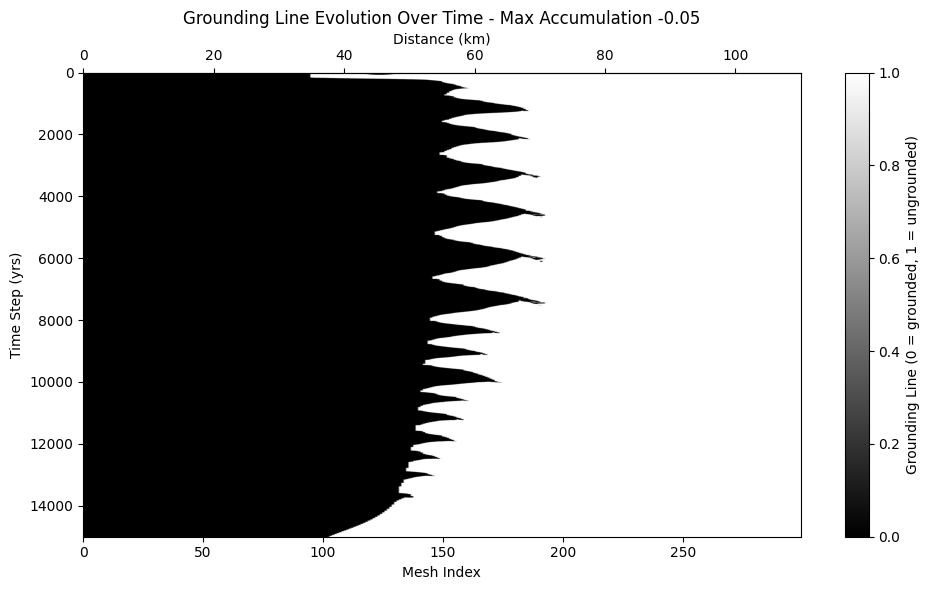

In [13]:
GL_dict = DATA_dict_amax05['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amax05)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [14]:
gl_positions_amax05 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amax05.append(idx)

gl_positions_amax05 = np.array(gl_positions_amax05)
GL_km_amax05 = mesh_index_to_km(gl_positions_amax05)



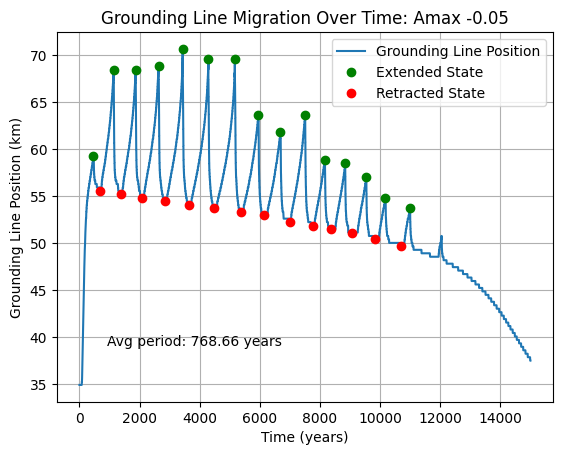

Mean cycle period: 768.66 years
[674.60801648 721.10593334 755.54657117 808.58369559 835.96918
 873.07890879 785.27693989 849.53120972 761.17822791 619.77071189
 682.03650421 762.9592351  862.94945279]
Mean advance amplitude: 63.11 km
[59.23076923 68.42809365 68.42809365 68.79598662 70.63545151 69.53177258
 69.53177258 63.64548495 61.80602007 63.64548495 58.86287625 58.49498328
 57.02341137 54.81605351 53.71237458]
Mean retreat amplitude: 52.92 km
[55.55183946 55.18394649 54.81605351 54.44816054 54.08026756 53.71237458
 53.34448161 52.97658863 52.24080268 51.8729097  51.50501672 51.13712375
 50.40133779 49.66555184]


In [15]:
peaks_amax05, _ = find_peaks(GL_km_amax05, prominence=2.8) 
troughs_amax05, _ = find_peaks(-GL_km_amax05, prominence=2.8)     
periods_amax05 = np.diff(np.array(time)[troughs_amax05])
adv_dists_amax05 = GL_km_amax05[peaks_amax05]
ret_dists_amax05 = GL_km_amax05[troughs_amax05]


plt.plot(time, GL_km_amax05, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amax05], GL_km_amax05[peaks_amax05], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amax05], GL_km_amax05[troughs_amax05], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amax05):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amax -0.05")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amax05):.2f} years")
print(periods_amax05)

print(f"Mean advance amplitude: {np.mean(adv_dists_amax05):.2f} km")
print(adv_dists_amax05)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amax05):.2f} km")
print(ret_dists_amax05)


18915.402954221456


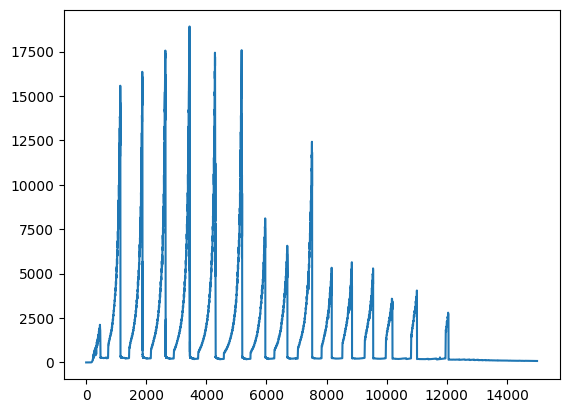

In [16]:
max_Qs_05 = np.array([max(values) for values in Qs_dict_05.values()])
time_05 = np.array(list(Qs_dict_05.keys()))

# mask = time_05 <= 10000

# time_05 = time_05[mask]
# max_Qs_05 = max_Qs_05[mask]
plt.plot(time_05, max_Qs_05)
MAX_05 = np.max(max_Qs_05)

# MAX_21 = np.median(max_Qs_55)
print(MAX_05)

Grounding Line Plot - Amax - 0.01


In [17]:
gl_run_title_amax01 = str("Grounding Line Evolution Over Time - Max Accumulation - 0.01")
amax01 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_09_01__14_28_48.pkl.gz"
with gzip.open(amax01, 'rb') as f:
    DATA_dict_amax01 = pickle.load(f)

In [18]:
bed_dict = DATA_dict_amax01['bed_dict']
base_dict = DATA_dict_amax01['base_dict']
surf_dict= DATA_dict_amax01['surf_dict']
sed_dict = DATA_dict_amax01['sed_dict']
H_dict = DATA_dict_amax01['H_dict']
us_dict_01 = DATA_dict_amax01['us_dict']
ub_dict_01 = DATA_dict_amax01['ub_dict']
Hs_dict = DATA_dict_amax01['Hs_dict']
GL_dict_01 = DATA_dict_amax01['GL_dict']
Qs_dict_01 = DATA_dict_amax01['Qs_dict']

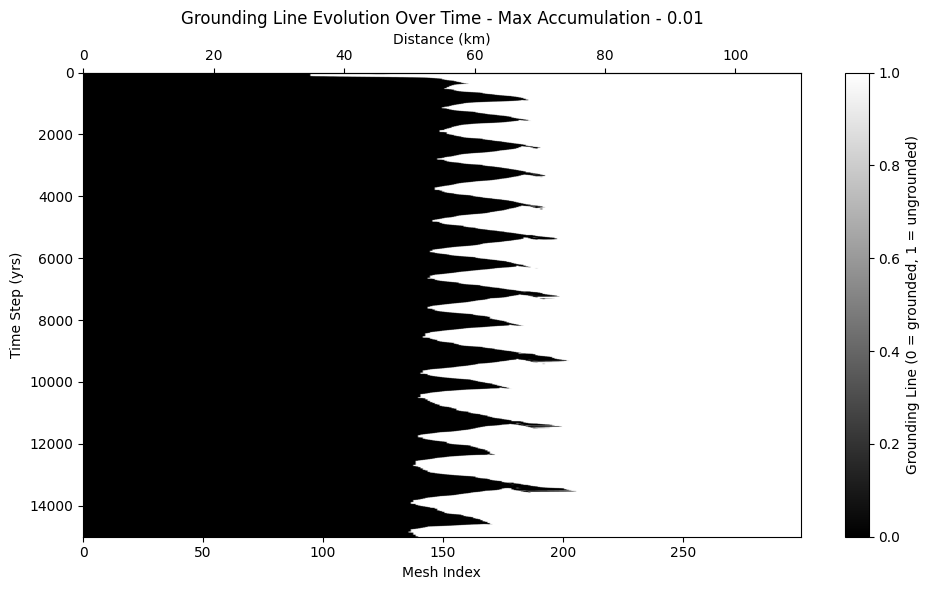

In [19]:
GL_dict = DATA_dict_amax01['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amax01)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [20]:
gl_positions_amax01 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amax01.append(idx)

gl_positions_amax01 = np.array(gl_positions_amax01)
GL_km_amax01 = mesh_index_to_km(gl_positions_amax01)
# mask = np.array(time) <= 10000
# time = np.array(time)[mask]
# GL_km_amax01 = GL_km_amax01[mask]


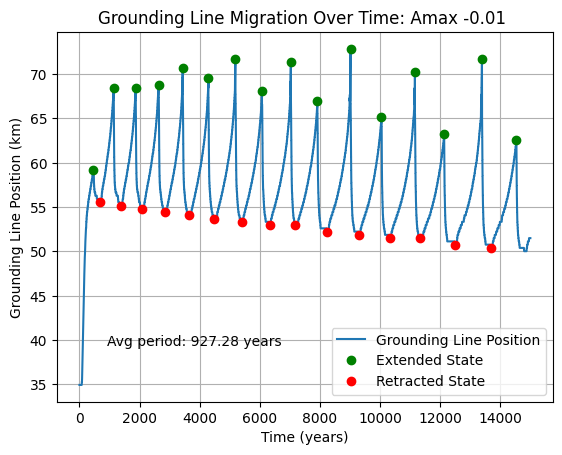

Mean cycle period: 927.28 years
[ 674.60801648  721.10593334  755.54657117  808.58369559  835.96918
  899.60723751  931.43456592  859.84576908 1067.27247517 1049.03908335
 1032.666932    985.67746292 1185.82807149 1174.79945698]
Mean advance amplitude: 68.06 km
[59.23076923 68.42809365 68.42809365 68.79598662 70.63545151 69.53177258
 71.73913043 68.06020067 71.37123746 66.95652174 72.84280936 65.11705686
 70.26755853 63.27759197 71.73913043 62.54180602]
Mean retreat amplitude: 53.03 km
[55.55183946 55.18394649 54.81605351 54.44816054 54.08026756 53.71237458
 53.34448161 52.97658863 52.97658863 52.24080268 51.8729097  51.50501672
 51.50501672 50.76923077 50.40133779]


In [21]:
peaks_amax01, _ = find_peaks(GL_km_amax01, prominence=3) 
troughs_amax01, _ = find_peaks(-GL_km_amax01, prominence=3)     
periods_amax01 = np.diff(np.array(time)[troughs_amax01])
adv_dists_amax01 = GL_km_amax01[peaks_amax01]
ret_dists_amax01 = GL_km_amax01[troughs_amax01]


plt.plot(time, GL_km_amax01, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amax01], GL_km_amax01[peaks_amax01], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amax01], GL_km_amax01[troughs_amax01], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amax01):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amax -0.01 ")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amax01):.2f} years")
print(periods_amax01)

print(f"Mean advance amplitude: {np.mean(adv_dists_amax01):.2f} km")
print(adv_dists_amax01)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amax01):.2f} km")
print(ret_dists_amax01)


19533.181417365835


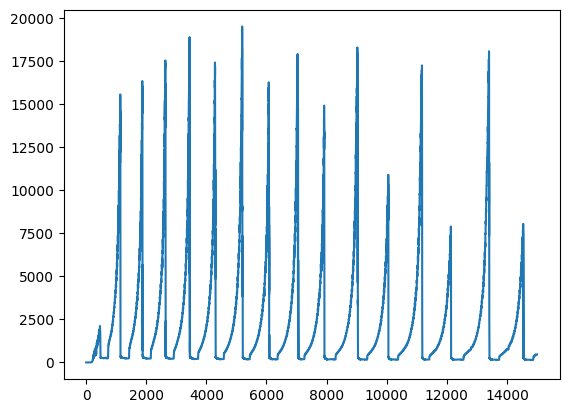

In [22]:
max_Qs_01 = np.array([max(values) for values in Qs_dict_01.values()])
time_01 = np.array(list(Qs_dict_01.keys()))

plt.plot(time_01, max_Qs_01)
MAX_01 = np.max(max_Qs_01)

print(MAX_01)

Grounding Line Plot - Amin & Amax -0.05


In [23]:
gl_run_title_amax_amin_05 = str("Grounding Line Evolution Over Time - Ablation & Accumulation - 0.05")
amax_amin_05 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_08_27__09_23_02.pkl.gz"
with gzip.open(amax_amin_05, 'rb') as f:
    DATA_dict_amax_amin_05 = pickle.load(f)

In [24]:
bed_dict = DATA_dict_amax_amin_05['bed_dict']
base_dict = DATA_dict_amax_amin_05['base_dict']
surf_dict= DATA_dict_amax_amin_05['surf_dict']
sed_dict = DATA_dict_amax_amin_05['sed_dict']
H_dict = DATA_dict_amax_amin_05['H_dict']
us_dict_accabl = DATA_dict_amax_amin_05['us_dict']
ub_dict_accabl = DATA_dict_amax_amin_05['ub_dict']
Hs_dict = DATA_dict_amax_amin_05['Hs_dict']
GL_dict_ = DATA_dict_amax_amin_05['GL_dict']
Qs_dict_accabl = DATA_dict_amax_amin_05['Qs_dict']

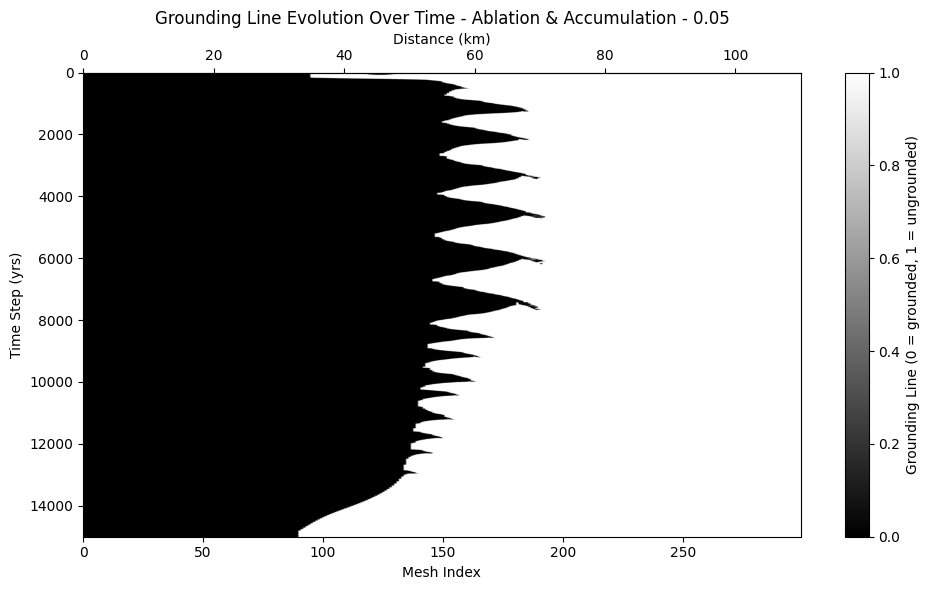

In [25]:
GL_dict = DATA_dict_amax_amin_05['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_amax_amin_05)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [26]:
gl_positions_amax_amin_05 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_amax_amin_05.append(idx)

gl_positions_amax_amin_05 = np.array(gl_positions_amax_amin_05)
GL_km_amax_amin_05 = mesh_index_to_km(gl_positions_amax_amin_05)
# mask = np.array(time) <= 10000
# time = np.array(time)[mask]
# GL_km_amax_amin_05 = GL_km_amax_amin_05[mask]


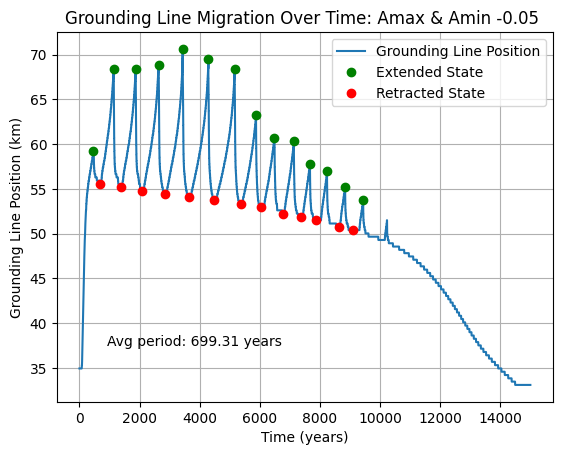

Mean cycle period: 699.31 years
[674.60801648 721.10593334 755.54657117 808.58369559 835.96918
 873.88088649 679.06842658 736.46121244 574.51140913 510.526198
 752.56438753 468.91284698]
Mean advance amplitude: 62.96 km
[59.23076923 68.42809365 68.42809365 68.79598662 70.63545151 69.53177258
 68.42809365 63.27759197 60.70234114 60.33444816 57.75919732 57.02341137
 55.18394649 53.71237458]
Mean retreat amplitude: 53.15 km
[55.55183946 55.18394649 54.81605351 54.44816054 54.08026756 53.71237458
 53.34448161 52.97658863 52.24080268 51.8729097  51.50501672 50.76923077
 50.40133779]


In [27]:
peaks_amax_amin_05, _ = find_peaks(GL_km_amax_amin_05, prominence=3) 
troughs_amax_amin_05, _ = find_peaks(-GL_km_amax_amin_05, prominence=3)     
periods_amax_amin_05 = np.diff(np.array(time)[troughs_amax_amin_05])
adv_dists_amax_amin_05 = GL_km_amax_amin_05[peaks_amax_amin_05]
ret_dists_amax_amin_05 = GL_km_amax_amin_05[troughs_amax_amin_05]


plt.plot(time, GL_km_amax_amin_05, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_amax_amin_05], GL_km_amax_amin_05[peaks_amax_amin_05], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_amax_amin_05], GL_km_amax_amin_05[troughs_amax_amin_05], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_amax_amin_05):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Amax & Amin -0.05 ")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_amax_amin_05):.2f} years")
print(periods_amax_amin_05)

print(f"Mean advance amplitude: {np.mean(adv_dists_amax_amin_05):.2f} km")
print(adv_dists_amax_amin_05)

print(f"Mean retreat amplitude: {np.mean(ret_dists_amax_amin_05):.2f} km")
print(ret_dists_amax_amin_05)


In [28]:
time_amin_amax = np.array(list(Qs_dict_accabl.keys()))


## Relationship Plots

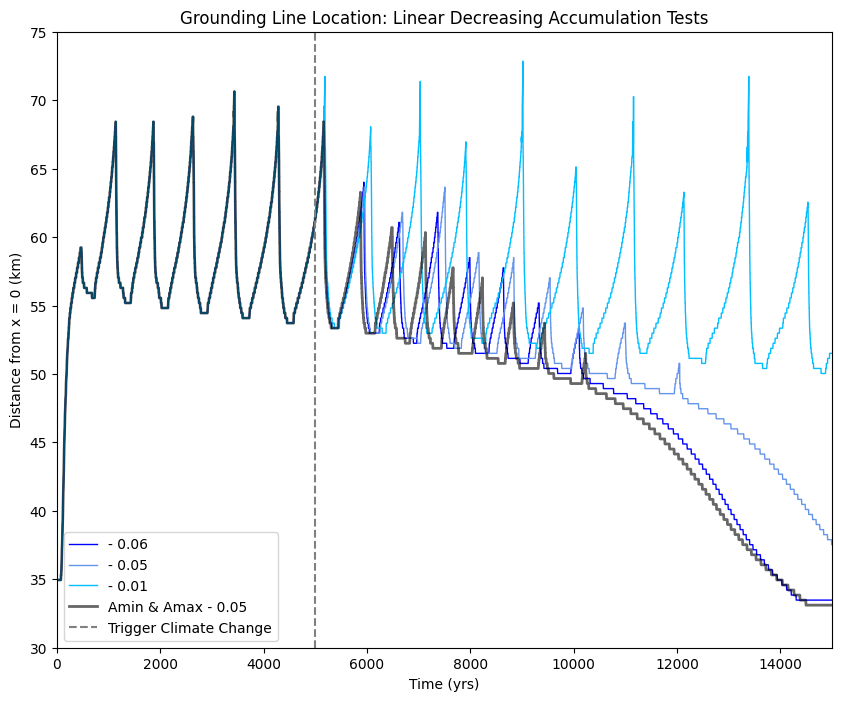

In [30]:
plt.figure(figsize=(10, 8))

plt.plot(time_06, GL_km_amax06, label='- 0.06', color = 'blue', linewidth = 1)
plt.plot(time_05, GL_km_amax05, label='- 0.05', color = 'cornflowerblue', linewidth = 1)
plt.plot(time_01, GL_km_amax01, label='- 0.01', color = 'deepskyblue', linewidth = 1)
plt.plot(time_amin_amax, GL_km_amax_amin_05, color = 'black', label='Amin & Amax - 0.05', linewidth = 2, alpha = 0.6)
plt.axvline(x=5000, color ='gray', linestyle = '--', label = 'Trigger Climate Change')

plt.xlim(0,15000)
plt.ylim(30,75)

plt.title("Grounding Line Location: Linear Decreasing Accumulation Tests") 
plt.xlabel("Time (yrs)")
plt.ylabel("Distance from x = 0 (km)")
plt.legend(loc = 3)